
# Analysis of Doctor Appointments

## Table of Contents
<ol>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ol>

<a id='intro'></a>
## Introduction

A person makes a doctor appointment, receives all the instructions and no-show. Who to blame? **Well Let's find Out**

### Dataset Description 
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
#### Data Dictionary
<dl>
<dt>PatientId</dt>
<dd>Identification of the patient</dd>
<dt>AppointmentID</dt>
<dd>Identification of each appointment</dd>
<dt>Gender</dt>
<dd>Male of Female</dd>

<dt>Age</dt>
<dd>The Age of the patient</dd>

<dt>Naighborhood</dt>
<dd>Where the appointment takes place</dd>

<dt>Scholarship</dt>
<dd>Indicates whether or not the patient is enrolled in the Brasilian welfare program</dd>

<dt>Schedule Day</dt>
<dd>When the appointment was scheduled</dd>

<dt>Hipertension</dt>
<dd>True or false :if patient is suffering from hypertension</dd>

<dt>Diabetes</dt>
<dd>True or False :if patient is suffering from diabetes</dd>

<dt>Alcoholisim</dt>
<dd>True or False :if patient is and alcoholic or not</dd>

<dt>Handcap</dt>
<dd>True of False : if patient is handicapped or not</dd>

<dt>SMS_received</dt>
<dd>Number of messages sent to patient</dd>

<dt>No_show</dt>
<dd>True or False: if patient showed up to the appointment</dd>

</dl>

### Questions for Analysis

1. Is Alcholism likely to affect if a patient will show up for an appointment?
2. What factors are important for us to know in order to predict if a patient will show up for their schedued appointment?

In [22]:
# importing the modules for use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')


<a id='wrangling'></a>
## Data Wrangling

### General Properties

We will begin our dataset exploration by importing our data and previewing the top of the dataset.

In [23]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


We will then check the number of columns and number of rows that are present in our data.

In [24]:
df.shape

(110527, 14)

We see that our data has 14 columns and 110,527 rows of data. We will then check on the names of our columns.

In [25]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

Having generated the dataset columns we will then check on the data types of the columns.

In [26]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

Our dataset has columns of different datatyeps namely float, integers, and string (we will assign the appropriate data types of these columns later) we will then generate the general information of the dataset.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning

Our first step towards effective data cleaning is ensuring that we have no missing values in our data and if there is any ensuring that they are dealed with appropriately.

We will check on missing values in the data.

In [28]:
df.isna().any() == True

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

None of teh columns has any missing, hence we will move on to the next step in data cleaning that is ensuring every column has the appropriate data type. We will first begin by checking on the data types of the column.

In [29]:
""" checking on the data types of the columns """
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

From the cell output above we see that the **AppointmentDay** and **ScheduleDay** are of data type object meaning that they are strings, why is this?

Lets visualize the dataset once again?

In [30]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


From the output above we see that reason is because they contain **T** and **Z** lets clean this up.

>We will begin by cleaning up the Schedule we will split this column on delimeter **T** and renaming the new columns

In [31]:
schedule = df['ScheduledDay'].str.split("T", expand=True)
schedule.columns = ["Schedule_date", "Schedule_Time"]

Having split the data based on the delimeter **T** we will remove the **Z** by splitting it from the rest of the data, we will then add the two columns together to produce a single colum containing the date and time that is clean.

In [32]:
schedule_day = schedule["Schedule_Time"].str.split("Z", expand=True)
schedule_day.columns = ["Schedule_Time", "drop"]
schd = pd.concat([schedule_day["Schedule_Time"], schedule['Schedule_date']], axis=1)
schd1 = pd.DataFrame(schd['Schedule_date'] + " " +schd['Schedule_Time'])
schd1.columns = ['schedule']

We will then move onto the **AppointmentDate** here we willl split the data based on the **T** and **Z** delimeter.

it will produce two columns one with date and teh other with time, hwoever we will notice that the time column is 0 hence we drop the column to remain with date only.

In [33]:
#appointment date column
appoint = df['AppointmentDay'].str.split("T", expand=True)
appoint.columns = ["appoint_date", "appoint_Time"]
app = appoint.drop(labels=["appoint_Time"], axis = 1)

We will then convert the concat the schedule and appointment columns and convert them to datetime

In [34]:
schd1['schedule'] = pd.to_datetime(schd1['schedule'])
time_d = pd.concat([schd1, app], axis=1)
time_d['appoint_date'] = pd.to_datetime(time_d["appoint_date"])


It is important to note that the **AppointmetId** and **PatientId** are unique identifiers of the **AppointmentDay** and **ScheduleDay** from our dataset since we will be replacing them with teh cleaned version.

In [35]:
df1 = df.drop(columns = ['AppointmentDay', 'ScheduledDay', 'PatientId', 'AppointmentID'])
df_comp = pd.concat([time_d, df1], axis=1)
#preview the dataset
df_comp.head(5)

,schedule,appoint_date,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2016-04-29 18:38:08,2016-04-29,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,2016-04-29 16:08:27,2016-04-29,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,2016-04-29 16:19:04,2016-04-29,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,2016-04-29 17:29:31,2016-04-29,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,2016-04-29 16:07:23,2016-04-29,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


From our dataset we have seen that some of the columns are of boolean type for the sake of viualizing we will convert the data type to string by assigning **Yes** or **No**.

In [36]:
df_comp1 = df_comp.replace(0, "No")
df_comp2 = df_comp1.replace(1, "Yes")
df_comp2.head()

,schedule,appoint_date,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2016-04-29 18:38:08,2016-04-29,F,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No
1,2016-04-29 16:08:27,2016-04-29,M,56,JARDIM DA PENHA,No,No,No,No,No,No,No
2,2016-04-29 16:19:04,2016-04-29,F,62,MATA DA PRAIA,No,No,No,No,No,No,No
3,2016-04-29 17:29:31,2016-04-29,F,8,PONTAL DE CAMBURI,No,No,No,No,No,No,No
4,2016-04-29 16:07:23,2016-04-29,F,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Replace this header name!)

In [37]:
""" setting the defaults for our visuals """
colors = ['#7FB3D5', '#73C6B6', '#F0B27A', '#C39BD3', '#ABEBC6', '#F4D03F']
plt.rcParams.update({'font.family':'Times New Roman'})
plt.rcParams.update({'font.size':13})
plt.rcParams['figure.figsize'] = [10, 5]

In [38]:
""" creating a function to add labels to our plots """

def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i],ha = "center")

### 1. Is alcholism likely to affect if a user will keep an appointemnt?

We will begin by analyzing the number of individuals who consume alcohol.

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


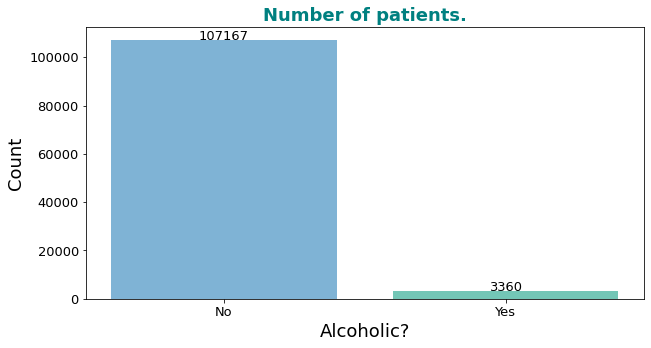

In [39]:
from turtle import color
alcohol_x = df_comp2["Alcoholism"].unique()
alcohol_y = df_comp2["Alcoholism"].value_counts()
plt.bar(alcohol_x, alcohol_y, color = colors)
addlabels(alcohol_x, alcohol_y)
plt.title('Number of patients.', fontsize = 18, fontweight = "bold", color = "teal")
plt.ylabel("Count", fontsize = 18)
plt.xlabel("Alcoholic?", fontsize= 18)
plt.show()

We will then group this alcohol consumers and non-alcohol consumers.

In [52]:
alcohol_g = df_comp2.groupby(by=df_comp2['Alcoholism'])
yes_alcohol = alcohol_g.get_group('Yes')
no_alcohol = alcohol_g.get_group('No')

In [56]:
yes_alcohol

,schedule,appoint_date,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
46,2016-04-25 12:44:36,2016-04-29,M,58,SÃO CRISTÓVÃO,No,Yes,No,Yes,No,Yes,No
131,2016-04-28 17:38:06,2016-04-29,M,29,PRAIA DO SUÁ,No,No,No,Yes,No,No,Yes
133,2016-04-14 07:07:10,2016-04-29,M,69,PRAIA DO SUÁ,No,No,Yes,Yes,No,No,No
186,2016-04-15 09:02:16,2016-04-29,M,66,REDENÇÃO,No,Yes,No,Yes,No,No,No
207,2016-04-29 16:49:22,2016-04-29,M,46,MARUÍPE,No,No,No,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110071,2016-06-01 11:08:40,2016-06-06,M,54,BONFIM,No,Yes,No,Yes,No,Yes,No
110167,2016-06-01 08:41:48,2016-06-03,M,64,BOA VISTA,No,No,No,Yes,No,No,No
110168,2016-06-01 08:42:49,2016-06-03,M,50,SANTO ANTÔNIO,No,Yes,Yes,Yes,No,No,Yes
110174,2016-05-30 07:36:20,2016-06-02,M,59,SÃO BENEDITO,No,Yes,No,Yes,No,Yes,No


We have created two groups for our patients based on if they consume alcohol we will analysze these groups separately. Lets craete a pe chart to see how many respondents consume alcohol.

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


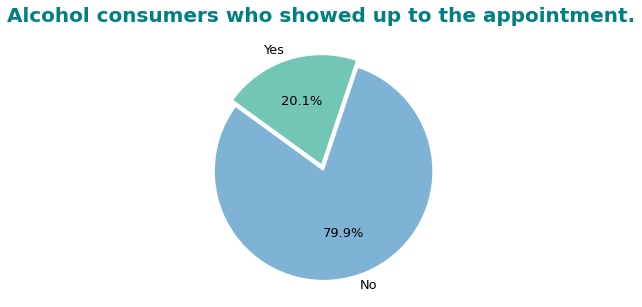

In [59]:
yes_alcohol['No-show'].value_counts().plot(kind = "pie", startangle=144, colors = colors, explode=(0.07, 0), autopct = '%1.1f%%')
plt.title('Alcohol consumers who showed up to the appointment.', fontsize = 20, fontweight = 'bold', color = 'teal')
plt.axis('off')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

From the chart above 2 out of 10 patients who are alcohol consumers never showed up fo the appointment

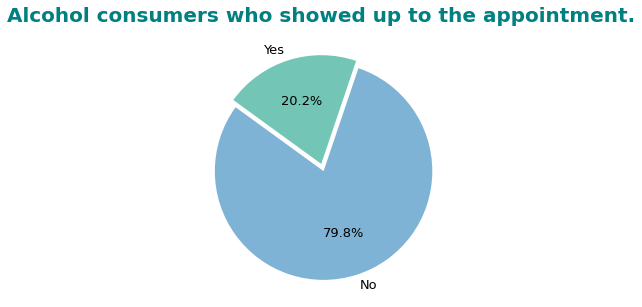

In [60]:
no_alcohol['No-show'].value_counts().plot(kind = "pie", startangle=144, colors = colors, explode=(0.07, 0), autopct = '%1.1f%%')
plt.title('Alcohol consumers who showed up to the appointment.', fontsize = 20, fontweight = 'bold', color = 'teal')
plt.axis('off')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

### Research Question 2  (Replace this header name!)

In [40]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

/bin/python: No module named nbconvert


1